In [2]:
from PIL import Image  
import numpy as np

obrazy w trybie L

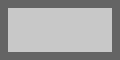

In [3]:
def rysuj_ramke_szare(w, h, grub, kolor_ramki, kolor): #kolor od 0 do 255
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    tab[:] = kolor_ramki  # wypełnienie tablicy szarym kolorem o wartości kolor_ramki
    tab[grub:h-grub, grub:w-grub] = kolor  # wypełnienie podtablicy kolorem o wartości kolor
    return Image.fromarray(tab)


im_ramka = rysuj_ramke_szare(120, 60, 8, 100, 200)
im_ramka 

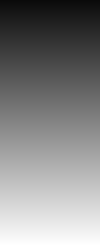

In [4]:
def rysuj_pasy_poziome_szare(w, h, grub, zmiana_koloru):  
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(h / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(w):
                tab[i, j] = (k + zmiana_koloru) % 256
    return Image.fromarray(tab)


im_paski = rysuj_pasy_poziome_szare(100, 246, 1, 10)
im_paski

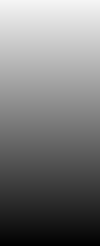

In [5]:
def negatyw_szare(obraz):  
    tab = np.asarray(obraz) 
    h, w = tab.shape
    tab_neg = tab.copy()
    for i in range(h):
        for j in range(w):
            tab_neg[i, j] = 255 - tab[i, j]
    return Image.fromarray(tab_neg)


obraz_neg = negatyw_szare(im_paski)
obraz_neg

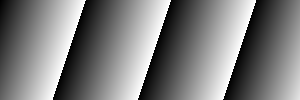

In [6]:
def rysuj_po_skosie_szare(h,w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return Image.fromarray(tab)


im_skos = rysuj_po_skosie_szare(100, 300, 1, 3)
im_skos

obrazy w trybie RGB

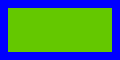

In [7]:
def rysuj_ramke_kolor(w, h, grub, kolor_ramki, kolor_tla):  # kolor_ramki, kolor podajemy w postaci [r, g, b]
    t = (h, w, 3)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)  # deklaracja tablicy
    tab[:] = kolor_ramki  # wypełnienie tablicy kolorem kolor_ramki
    tab[grub:h - grub, grub:w - grub, 0] = kolor_tla[0]  #  wartości kanału R 
    tab[grub:h - grub, grub:w - grub, 1] = kolor_tla[1]  #  wartości kanału G 
    tab[grub:h - grub, grub:w - grub, 2] = kolor_tla[2]  #  wartości kanału B 
    # tab[grub:h - grub, grub:w - grub] = kolor_tla # wersja równoważna
    return Image.fromarray(tab)


im_ramka_kolor = rysuj_ramke_kolor(120, 60, 8, [0, 0, 255], [100, 200, 0])
im_ramka_kolor


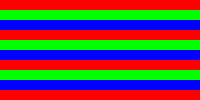

In [8]:
def rysuj_pasy_poziome_3kolory(w, h, grub):  # funkcja rysuje pasy poziome na przemian czerwony, zielony, niebieski
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(h / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(w):
                if k % 3 == 0:
                    tab[i, j] = [255, 0, 0]
                elif k % 3 == 1:
                    tab[i, j] = [0, 255, 0]
                else:
                    tab[i, j] = [0, 0, 255]
    return Image.fromarray(tab)


obraz1 = rysuj_pasy_poziome_3kolory(200, 100, 10)
obraz1


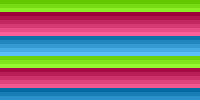

In [12]:
def rysuj_pasy_poziome_kolor(w, h, grub, kolor,
                             zmiana_koloru):  # funkcja rysuje pasy poziome, przy czym kazda składowa koloru zwieksza się o "zmiana_koloru"
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    tab[:] = kolor
    ile = int(h / grub)
    for k in range(ile):
        r = (kolor[0] + k * zmiana_koloru) % 256
        g = (kolor[1] + k * zmiana_koloru) % 256
        b = (kolor[2] + k * zmiana_koloru) % 256
        for m in range(grub):
            i = k * grub + m
            for j in range(w):
                tab[i, j] = [r, g, b]
    return Image.fromarray(tab)


obraz2 = rysuj_pasy_poziome_kolor(200, 100, 4, [100, 200, 0], 19)
obraz2


Dlaczego jest efekt "przeskakiwania" koloru?

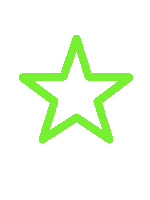

In [10]:
def koloruj_obraz(obraz, kolor):
    t_obraz = np.asarray(obraz)
    h, w = t_obraz.shape
    t =(h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if t_obraz[i, j] == False:
                tab[i, j] = kolor
            else:
                tab[i, j] = [255, 255, 255]
    return Image.fromarray(tab)

gwiazdka = Image.open("gwiazdka.bmp")
obraz3 = koloruj_obraz(gwiazdka, [120, 240, 50])
obraz3

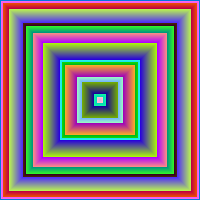

In [11]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)


obraz3 = rysuj_ramki_kolorowe(200, [0,120,220], 8, 15, -13)
obraz3